### Gradient descent

This notebook contains a review of the gradient descent algotithm: a widely used tool in optimization and machine learning. The  algorithm aims to find the point where the minimum of a function lies (One can also use it to find maxima by slightly modifying it). 

In [2]:
from IPython.display import clear_output, display # This library is included to work with dynamical plots.
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import jax 
import jax.numpy as jnp
import time # This library is included to control the time each frame of the dynamical plot appears

In [3]:
def gradient_descent_1D(f, x_min, x_max, N, learning_rate=0.001):
    """
    Implements the gradient descent algorithm in one dimension to the point x_i where the minimum of the function f lies in the interval [x_min, x_max].

    Parameters:
    f (function): The objective function of which we wish to find the point where the minimum lies.
    x_min (Real): The lower bound of the interval where we look for the minimum.
    x_max (Real): The upper bound of the interval where we look for the minimum.
    N (int): The number of iterations.
    learning_rate (Real): The learning rate which controls the resolution of the steps between points.
    """
    x = np.linspace(x_min, x_max, 100) # Definition of the interval/x-axis.
    x_0 = np.random.uniform(x_min, x_max) # Random choice of initial point.
    x_i = x_0
    fig, ax = plt.subplots()

    for i in range(N):
        gradient = jax.grad(f)(x_i)
        x_i = x_i - learning_rate * gradient # Point update.
        x_i = np.clip(x_i, x_min, x_max) # Ensure that x_i lies within the interval [x_min, x_max]. If x_i < x_min, x_i is set to x_min. If x_i > x_max, x_i is set to x_max.
        
        # Clear and redraw plot
        ax.cla()
        plt.grid()
        ax.plot(x, f(x), label=r'$f(x)$')
        ax.plot([x_i], [f(x_i)], marker='o', color='red', label=r'$f(x_i)$')
        ax.legend(loc='upper right')
        ax.set_title(f"Iteration {i+1}/{N}")
        plt.xlabel(r'$x$')
        plt.ylabel(r'$f(x)$')
        clear_output(wait=True)  # Clear previous output
        display(fig)            # Display updated figure
        time.sleep(0.3)

        # Stop iterating when we are very close to minimum.
        if abs(gradient) < 1e-6:
            print(f"Converged at iteration {i+1}")
            break
        
    return x_i

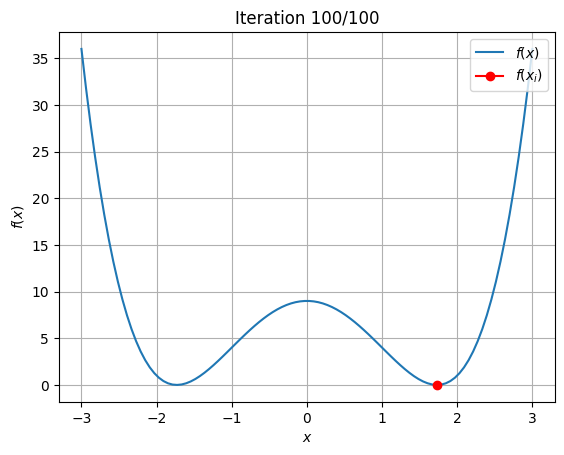

np.float32(1.732051)

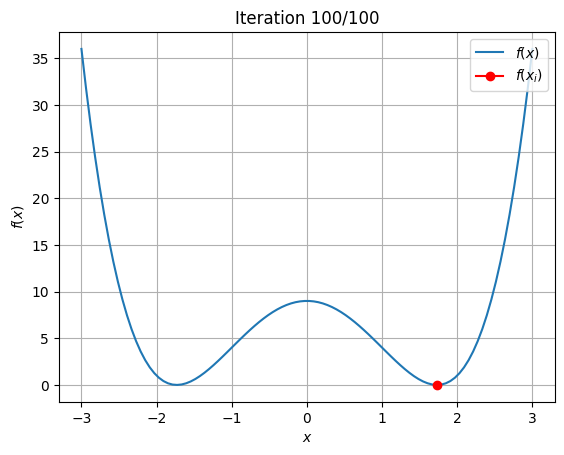

In [3]:
def f1(x):
    return (3 - x ** 2) ** 2 # This function is important in physics. It is the Higgs or double well potenital.

gradient_descent_1D(f1, -3., 3., 100, 0.01)

In [18]:
def F(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-2., 2., 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y) # Generates an "x-axis" for every point y.

In [23]:
nablaF = [jax.grad(F, argnums=(i)) for i in range(0, 2)]

nablaF[0](0., 0.)

Array(0., dtype=float32, weak_type=True)

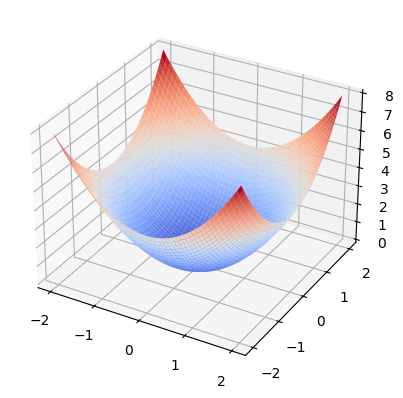

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, F(X, Y), cmap=cm.coolwarm)

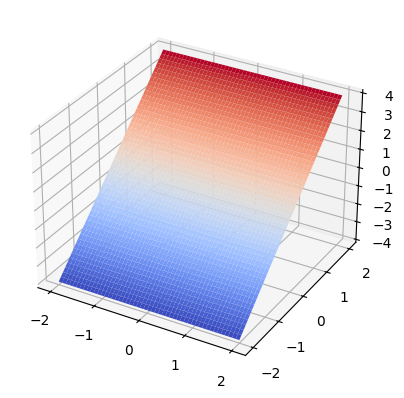

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, delFdelx(X, Y), cmap=cm.coolwarm)

In [38]:
def gradient_descent_2D(f, vec_x_min, vec_x_max, N, learning_rate=0.001, seed=None):
    """
    Implements gradient descent in 2D for minimizing a function f.

    Parameters:
        f (function): The objective function to minimize, taking two arguments.
        vec_x_min (list): Lower bounds for the search space [x_min, y_min].
        vec_x_max (list): Upper bounds for the search space [x_max, y_max].
        N (int): Number of iterations.
        learning_rate (float): Step size for updating the parameters.
        seed (int, optional): Random seed for reproducibility.

    Returns:
        vec_x_i (list): Approximate coordinates of the minimum point.
        f_value (float): Function value at the minimum point.
    """
    # Set random seed if provided
    if seed is not None:
        np.random.seed(seed)
    
    # Random initialization within bounds
    vec_x_0 = [
        np.random.uniform(vec_x_min[0], vec_x_max[0]),
        np.random.uniform(vec_x_min[1], vec_x_max[1])
    ]
    vec_x_i = np.array(vec_x_0)
    
    # Compute gradients
    nablaf = [jax.grad(f, argnums=i) for i in range(2)]
    
    # Gradient descent loop
    for i in range(N):
        gradients = np.array([nablaf[k](vec_x_i[0], vec_x_i[1]) for k in range(2)])
        vec_x_i = vec_x_i - learning_rate * gradients
        
        # Constrain within bounds
        vec_x_i = np.clip(vec_x_i, vec_x_min, vec_x_max)
    
    return vec_x_i, f(vec_x_i[0], vec_x_i[1])

        

In [40]:
def F(x, y):
    return x ** 2 + y ** 2

gradient_descent_2D(F, [-2., -2.], [2., 2.], 10000, 0.001)

(array([ 1.24730276e-09, -1.72350319e-09]), np.float64(4.5262274064882814e-18))